# Renewal Signal ?

In [48]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import cmocean.cm as cm
import datetime as datetime
#
from Calculations_Functions import proportions_from_filename, metrics_table
from matplotlib.colors import ListedColormap
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec
mask = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')

See if SalishSeaCast captures the deep water renewal signal

In [50]:
begin = pd.to_datetime(datetime.datetime(2022,1,1)).to_pydatetime()
end = pd.to_datetime(datetime.datetime(2022,12,31)).to_pydatetime()
t_len = (end - begin).days

In [52]:
import os; import glob; from datetime import timedelta
def date_files(date, path, prefix_type= 'grid_T.nc'):
    folder = date.strftime("%d%b%y").lower()
    prefix = os.path.join(path, folder + f'/SalishSea_1h_{date.strftime("%Y%m%d").lower()}_{date.strftime("%Y%m%d").lower()}_{prefix_type}*')
    file_name = glob.glob(prefix) 
    return file_name
#
def get_timestamps(start,length):
    timestamps=[]
    duration = timedelta(days=length)
    for day in range(duration.days):
        timestamps.append([start + timedelta(days=day)])
    return timestamps
#
dates = get_timestamps(begin,t_len)
hourly_dates = pd.date_range(start=begin, end=end, freq='H')[:-1]
#
path_days_h = '/results2/SalishSea/nowcast-green.202111/'
#
files= []
for i in range(t_len):
    files.append(date_files(dates[i][0],path_days_h, prefix_type = 'grid_T.nc'))
#
path_bat = '/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc'
bat_file = xr.open_dataset(path_bat)
mbathy = bat_file['mbathy'][0]

/tmp/ipykernel_2165050/3978947034.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_dates = pd.date_range(start=begin, end=end, freq='H')[:-1]


In [56]:
xr.open_dataset(files[0][0])

<xarray.Dataset> Size: 6GB
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat               (y, x) float32 1MB ...
    nav_lon               (y, x) float32 1MB ...
  * deptht                (deptht) float32 160B 0.5 1.5 2.5 ... 414.5 441.5
    time_centered         (time_counter) datetime64[ns] 192B ...
  * time_counter          (time_counter) datetime64[ns] 192B 2022-01-01T00:30...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_lon            (y, x, nvertex) float32 6MB ...
    bounds_lat            (y, x, nvertex) float32 6MB ...
    area                  (y, x) float32 1MB ...
    deptht_bounds         (deptht, axis_nbounds) float32 320B ...
    sossheig              (time_counter, y, x) float32 34MB ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] 384B ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] 384B ...
    votemper              (time_counter, deptht, y, x) float32 1GB ...
    vosaline              (time_counter, deptht, y, x) float32 1GB ...
    sigma_theta           (time_counter, deptht, y, x) float32 1GB ...
    e3t                   (time_counter, deptht, y, x) float32 1GB ...
Attributes:
    name:         SalishSea_1h_20220101_20220105
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2022-Dec-24 01:34:38 GMT
    uuid:         80203c76-6832-455f-aebb-55ca14bc2c2f

In [ ]:
jjii = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/grid_from_lat_lon_mask999.nc')

def finder(lati, loni):
    j = jjii.jj.sel(lats=lati, lons=loni, method='nearest').item()
    i = jjii.ii.sel(lats=lati, lons=loni, method='nearest').item()
    return j, i

a, b = finder(49.2, -123.5)

# Depth index
depth_idx = mbathy[a, b].item()

# all file paths
filepaths_grid_T = [f[0] for f in files]

ds = xr.open_mfdataset(filepaths_grid_T, combine='nested', concat_dim='time', parallel=True)

temp_series = ds['votemper'].isel(deptht=depth_idx - 1, y=a, x=b)
sal_series  = ds['vosaline'].isel(deptht=depth_idx - 1, y=a, x=b)

files_temp = temp_series.load().values
files_sal  = sal_series.load().values


/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/core/indexing.py:1593: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/core/indexing.py:1593: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array

In [25]:
filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_full_release_run_tau_0_01_ratio_0_2_sv_5_AD_0_052.zarr'
filename2 = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/RESTART_runs/PBDE_particles_for_0112022_run_365_days_full_release_run_tau_0_01_ratio_0_2_sv_5_AD_0_052_restart_365_days_2nd_year_after_full_release.zarr'
filename3 = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112018_run_365_days_full_release_export_kernels_added.zarr'
#
vars_to_keep = ['trajectory', 'obs', 'lon', 'lat', 'z', 'time', 'status']
#
data = xr.open_dataset(filename, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename, engine = 'zarr').variables if v not in vars_to_keep])
data2 = xr.open_dataset(filename2, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename2, engine = 'zarr').variables if v not in vars_to_keep])
data3 = xr.open_dataset(filename3, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename3, engine = 'zarr').variables if v not in vars_to_keep])

# 
#DATA = xr.concat([data, data2], dim='obs' )

# IDEAS

- Create a time series that shows the time of the resuspension transitions from the sediment to the water column
- Try to quantify how much is resuspending in time, and match this with the $\tau$ parameter


Deep water renewal times:

- Spring
- Fall

In [35]:
def resuspension_timeseries(data):
    status = data.status.values
    times = data.time.values

    status_now = status[:, :-1]
    status_next = status[:, 1:]

    # All resuspension transitions
    all_transitions = (
        ((status_now == 11) & (status_next == 2)) |
        ((status_now == 12) & (status_next == 2)) |
        ((status_now == 13) & (status_next == 2)) 
        #((status_now == 12) & (status_next == 3)) |
        #((status_now == 13) & (status_next == 3))
    )

    particle_idx, time_idx = np.where(all_transitions)

    transition_times = times[particle_idx, time_idx + 1]

    resuspension_counts = pd.Series(transition_times.ravel()).value_counts().sort_index()

    all_times = times[0, :]  
    resuspension_timeseries = resuspension_counts.reindex(all_times, fill_value=0)
    #
    return resuspension_timeseries


In [ ]:
from scipy.signal import butter, filtfilt

def smooth_resuspension(resuspension_timeseries: pd.Series, cutoff_days: float) -> pd.Series:
    # no NaNs
    ts = resuspension_timeseries.copy().astype(float)
    ts = ts.interpolate("time").fillna(0)

    fs = 24 / 6  
    nyq = 0.5 * fs  

    # cutoff frequency
    fc = 1.0 / cutoff_days  
    Wn = fc / nyq

    b, a = butter(N=4, Wn=Wn, btype="low")

    smoothed_vals = filtfilt(b, a, ts.values)

    return pd.Series(smoothed_vals, index=ts.index, name="smoothed")

In [43]:
resuspension_timeseries_data1 = resuspension_timeseries(data)
smoothed_90_days_data1 = smooth_resuspension(resuspension_timeseries_data1, cutoff_days=90)
#
resuspension_timeseries_data2 = resuspension_timeseries(data2)
smoothed_90_days_data2 = smooth_resuspension(resuspension_timeseries_data2, cutoff_days=90)
#
resuspension_timeseries_data3 = resuspension_timeseries(data3)
smoothed_90_days_data3 = smooth_resuspension(resuspension_timeseries_data3, cutoff_days=90)

Text(0, 0.5, 'Number of Particles')

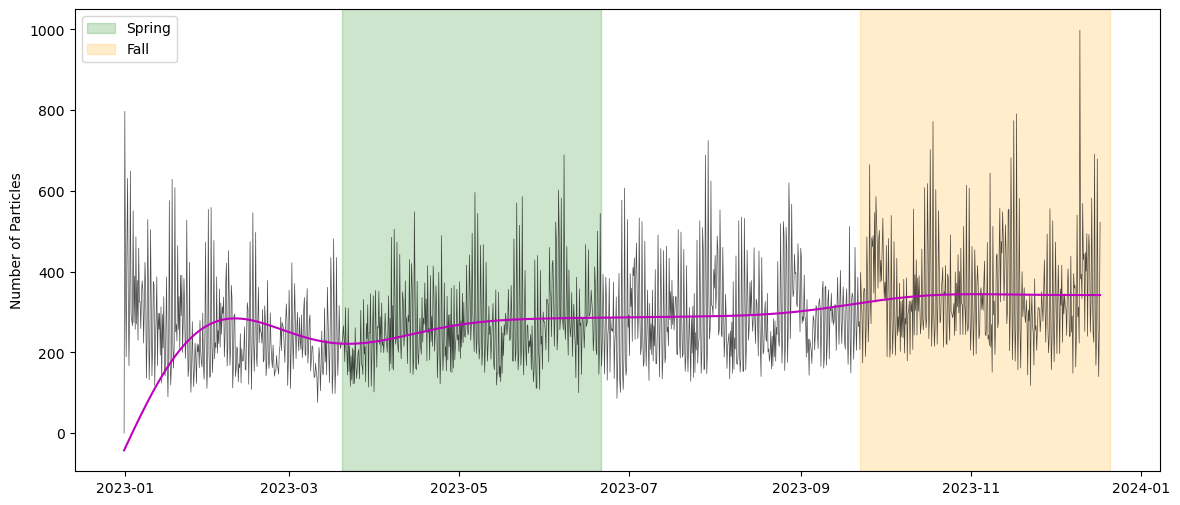

In [46]:
fig, ax = plt.subplots(figsize = (14,6))
ax.plot(resuspension_timeseries_data2, 'k', linewidth = .5, alpha = .7)

#ax.plot(smoothed_5_days, 'r')
#ax.plot(smoothed_15_days, 'g')
#ax.plot(smoothed_30_days, 'b')
#ax.plot(smoothed_60_days, 'c')
ax.plot(smoothed_90_days_data2, 'm')


spring_start = "2023-03-20"
spring_end   = "2023-06-21"
fall_start   = "2023-09-22"
fall_end     = "2023-12-21"

# Add shaded seasons
ax.axvspan(pd.to_datetime(spring_start), pd.to_datetime(spring_end),
           color="green", alpha=0.2, label="Spring")
ax.axvspan(pd.to_datetime(fall_start), pd.to_datetime(fall_end),
           color="orange", alpha=0.2, label="Fall")
ax.legend()

ax.set_ylabel('Number of Particles')